# **Problem Statement :**
You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.
Data set:

Independant variable X: Outside Air Temperature
<br>Dependant variable Y: Overall daily revenue generated in dollars

# **Step  1 : Import Libraries**


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# **Step 2 : Import dataset**

In [4]:
IceCream = pd.read_csv("IceCreamData.csv")

In [5]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685945,343.362905


In [6]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# **Step 3 : Import dataset**

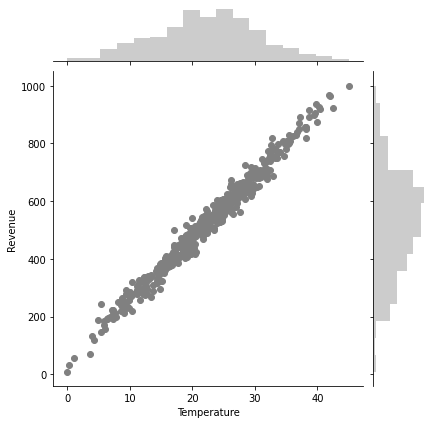

In [9]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'gray')

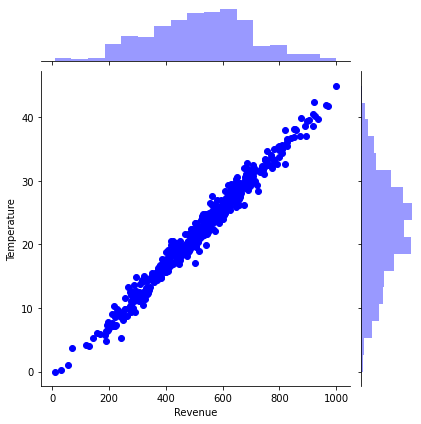

In [11]:
sns.jointplot(x='Revenue', y='Temperature', data = IceCream, color = 'blue')

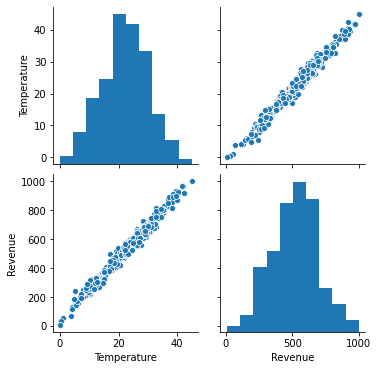

In [10]:
sns.pairplot(IceCream)

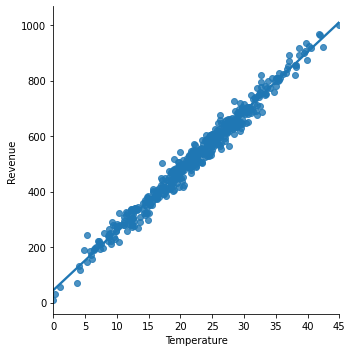

In [12]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# **Step 4 : Split into Training and Test dataset**

In [13]:
y = IceCream['Revenue']

In [14]:
X = IceCream[['Temperature']]

In [15]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# **Step 5 : Train the model**

In [19]:
X_train.shape

(375, 1)

In [21]:
regressor = LinearRegression(fit_intercept = True)

In [22]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.44134252]
Linear Model Coefficient (b):  45.51399774623053


# **Step 6 : Test the model**

In [26]:
y_predict = regressor.predict(X_test)
y_predict

array([738.81569313, 436.45888112, 396.40038861, 580.46938693,
       485.31104111, 450.93737944, 510.8758855 , 240.0692716 ,
       589.56896126, 677.25712747, 706.63602583, 559.77689745,
       322.14533841, 395.01056036, 676.54511152, 571.29531272,
       635.77769425, 605.60769847, 659.4596695 , 662.81242521,
       547.76988136, 531.77277273, 627.20500982, 525.75670038,
       703.04697709, 571.44553013, 537.38519401, 504.88527946,
       130.99040646, 415.63833579, 388.41139091, 450.48009993,
       484.4953419 , 233.25447929, 409.04719656, 434.87198442,
       623.66302075, 667.17864479, 353.83400604, 741.60655381,
       519.76874256, 636.71528792, 657.62117408, 457.25145557,
       470.36644617, 416.43215261, 414.29286797, 690.5808534 ,
       124.08943337, 639.54766225, 601.60325953, 621.71976508,
       454.32730887, 607.09852617, 330.72236943, 353.25116388,
       664.43097748, 614.35750554, 565.31887941, 176.175335  ,
       722.63135934, 523.11774239, 538.73968028, 424.10

In [27]:
y_test

251    747.963270
33     418.137279
85     406.579249
272    607.542148
64     498.757050
          ...    
485    501.345330
210    493.115468
338    771.789537
286    550.701404
278    797.566536
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

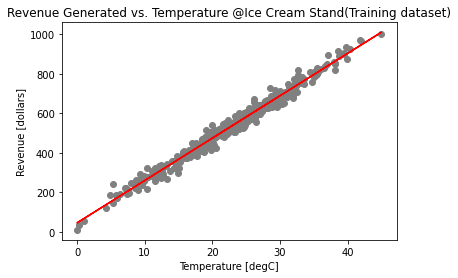

In [28]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

# **Step 7 : Visualize Test set results**

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

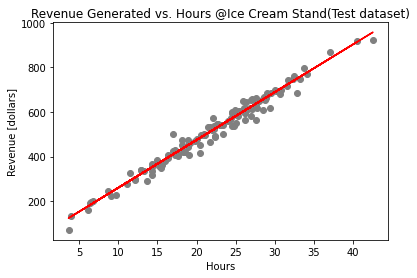

In [29]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [31]:
y_predict = regressor.predict([[30]])
y_predict

array([688.75427337])